# Stock Price Prediction

In [1]:
## Data Collection: Collecting Stock Data

In [2]:
import pandas_datareader as pdr 
#Provides access to certain API for data eg. - Tiingo
%matplotlib inline

In [3]:
key = '3a0b110779188ac2dda199bf372b6581c9204299'

In [4]:
df = pdr.get_data_tiingo('AAPL',api_key = key)

In [5]:
df.to_csv('AAPL.csv')

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('AAPL.csv')

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-08-10 00:00:00+00:00,108.00,108.90,107.76,108.71,24008505,25.317120,25.528096,25.260860,25.483557,96034020,0.0,1.0
1,AAPL,2016-08-11 00:00:00+00:00,107.93,108.93,107.85,108.52,27484506,25.300711,25.535129,25.281958,25.439018,109938024,0.0,1.0
2,AAPL,2016-08-12 00:00:00+00:00,108.18,108.44,107.78,107.78,18660434,25.359316,25.420264,25.265548,25.265548,74641736,0.0,1.0
3,AAPL,2016-08-15 00:00:00+00:00,109.48,109.54,108.08,108.14,25868209,25.664059,25.678124,25.335874,25.349939,103472836,0.0,1.0
4,AAPL,2016-08-16 00:00:00+00:00,109.38,110.23,109.21,109.63,33794448,25.640617,25.839872,25.600766,25.699221,135177792,0.0,1.0


## Many features, we will take close

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1257 non-null   object 
 1   date         1257 non-null   object 
 2   close        1257 non-null   float64
 3   high         1257 non-null   float64
 4   low          1257 non-null   float64
 5   open         1257 non-null   float64
 6   volume       1257 non-null   int64  
 7   adjClose     1257 non-null   float64
 8   adjHigh      1257 non-null   float64
 9   adjLow       1257 non-null   float64
 10  adjOpen      1257 non-null   float64
 11  adjVolume    1257 non-null   int64  
 12  divCash      1257 non-null   float64
 13  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.6+ KB


In [10]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-08-02 00:00:00+00:00,145.52,146.950,145.25,146.36,62879961,145.301263,146.729113,145.031668,146.140000,62879961,0.00,1.0
1253,AAPL,2021-08-03 00:00:00+00:00,147.36,148.045,145.18,145.81,64786618,147.138497,147.822467,144.961774,145.590827,64786618,0.00,1.0
1254,AAPL,2021-08-04 00:00:00+00:00,146.95,147.790,146.28,147.27,56368271,146.729113,147.567851,146.060120,147.048632,56368271,0.00,1.0
1255,AAPL,2021-08-05 00:00:00+00:00,147.06,147.840,146.17,146.98,46397674,146.838948,147.617775,145.950286,146.759068,46397674,0.00,1.0
1256,AAPL,2021-08-06 00:00:00+00:00,146.14,147.110,145.63,146.35,54126813,146.140000,147.110000,145.630000,146.350000,54126813,0.22,1.0


In [11]:
df1 = df.reset_index()['close']

In [12]:
df1

0       108.00
1       107.93
2       108.18
3       109.48
4       109.38
         ...  
1252    145.52
1253    147.36
1254    146.95
1255    147.06
1256    146.14
Name: close, Length: 1257, dtype: float64

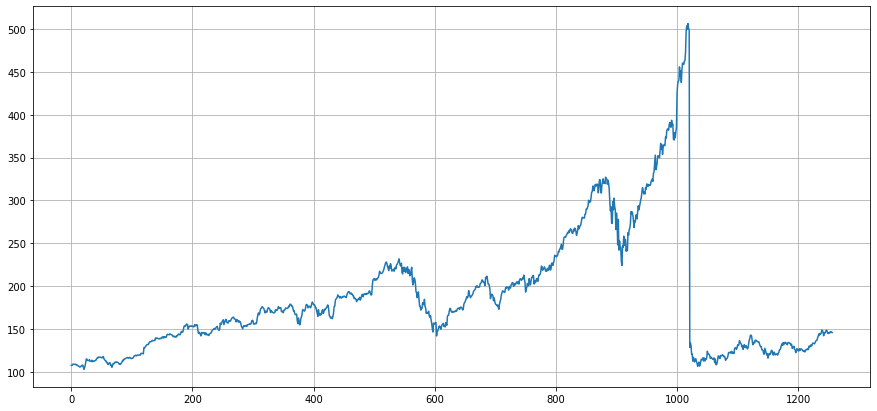

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,7))
plt.grid()
plt.plot(df1)

### LSTM are sensitive toscale of data, so we apply min max scaler

In [14]:
import numpy as np

In [15]:
df1.shape

(1257,)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
df1.shape

(1257, 1)

In [18]:
df1

array([[0.01208557],
       [0.01191185],
       [0.01253226],
       ...,
       [0.10874528],
       [0.10901826],
       [0.10673516]])

In [19]:
#Splitting into Train Test Split
#Time series = Sequentially split

In [20]:
training_size = int(len(df)*0.65)
test_size = len(df1) - training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:]

In [21]:
training_size,test_size

(817, 440)

## Batches of data by time steps for both test and train data
    - We have to make batches of data
    - How much time step need to be taken

In [22]:
def create_dataset(dataset,time_step = 1):
    dataX, dataY = [],[]
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step),0]   #i = 0 then 0,1,2,3 will be x and y = 4 (if our time step is 3)
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [23]:
time_step = 100
#Using 100 consecutive values predicting 101th value
#f1-------f100 = X
#f101 = y
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data,time_step)

In [24]:
X_train

array([[0.01208557, 0.01191185, 0.01253226, ..., 0.0338247 , 0.03375025,
        0.03149196],
       [0.01191185, 0.01253226, 0.01575839, ..., 0.03375025, 0.03149196,
        0.0323109 ],
       [0.01253226, 0.01575839, 0.01551022, ..., 0.03149196, 0.0323109 ,
        0.03198829],
       ...,
       [0.22597776, 0.2258785 , 0.22237939, ..., 0.34782609, 0.34775164,
        0.36140064],
       [0.2258785 , 0.22237939, 0.22523327, ..., 0.34775164, 0.36140064,
        0.37892098],
       [0.22237939, 0.22523327, 0.23654953, ..., 0.36140064, 0.37892098,
        0.38309013]])

In [25]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(716, 100) (339, 100)
(716,) (339,)


## TS Generator

In [26]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [27]:
tstrain = TimeseriesGenerator(train_data,train_data, length = 100, sampling_rate=1, batch_size=1)

In [28]:
tstest =  TimeseriesGenerator(test_data,test_data, length = 100, sampling_rate=1, batch_size=1)

In [29]:
tstrain[0][0].shape

(1, 100, 1)

### Reshape X into 3-Dimesions = [samples, timesteps, features] which is required for LSTM
    - Here for xtrain it will be - [717,100,1]
    - For xtest = [340,100,1]
    - If we imagine in 3-d = X axis to be number of featiures, y to be time steps, z to be samples,so our shape will be [z,y,x] = [samples,timesteps,features]

In [30]:
X_train

array([[0.01208557, 0.01191185, 0.01253226, ..., 0.0338247 , 0.03375025,
        0.03149196],
       [0.01191185, 0.01253226, 0.01575839, ..., 0.03375025, 0.03149196,
        0.0323109 ],
       [0.01253226, 0.01575839, 0.01551022, ..., 0.03149196, 0.0323109 ,
        0.03198829],
       ...,
       [0.22597776, 0.2258785 , 0.22237939, ..., 0.34782609, 0.34775164,
        0.36140064],
       [0.2258785 , 0.22237939, 0.22523327, ..., 0.34775164, 0.36140064,
        0.37892098],
       [0.22237939, 0.22523327, 0.23654953, ..., 0.36140064, 0.37892098,
        0.38309013]])

In [31]:
y_train

array([0.0323109 , 0.03198829, 0.03345245, 0.03667858, 0.03935875,
       0.03965654, 0.04124479, 0.04000397, 0.03948283, 0.0418652 ,
       0.04184038, 0.04131924, 0.0418652 , 0.04206373, 0.04179075,
       0.04653067, 0.04667957, 0.04670439, 0.04591026, 0.04521541,
       0.06357951, 0.06303355, 0.06439845, 0.06740123, 0.07047846,
       0.07174409, 0.07268712, 0.07194262, 0.07484614, 0.07913937,
       0.08035537, 0.0799459 , 0.08087651, 0.08330852, 0.08432599,
       0.08288664, 0.08320925, 0.08387929, 0.08402819, 0.09097677,
       0.08891701, 0.09095196, 0.08986004, 0.09030673, 0.08901628,
       0.08822216, 0.08936371, 0.08951261, 0.08899146, 0.09263947,
       0.09321024, 0.0914731 , 0.0951211 , 0.09110085, 0.09502184,
       0.09378102, 0.09308616, 0.09368176, 0.10092813, 0.10172226,
       0.10125074, 0.1005807 , 0.10067997, 0.10333532, 0.10147409,
       0.1005807 , 0.09978658, 0.0993647 , 0.09554298, 0.09596486,
       0.09410363, 0.09603931, 0.09447588, 0.09318543, 0.09755

In [32]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [33]:
X_train

array([[[0.01208557],
        [0.01191185],
        [0.01253226],
        ...,
        [0.0338247 ],
        [0.03375025],
        [0.03149196]],

       [[0.01191185],
        [0.01253226],
        [0.01575839],
        ...,
        [0.03375025],
        [0.03149196],
        [0.0323109 ]],

       [[0.01253226],
        [0.01575839],
        [0.01551022],
        ...,
        [0.03149196],
        [0.0323109 ],
        [0.03198829]],

       ...,

       [[0.22597776],
        [0.2258785 ],
        [0.22237939],
        ...,
        [0.34782609],
        [0.34775164],
        [0.36140064]],

       [[0.2258785 ],
        [0.22237939],
        [0.22523327],
        ...,
        [0.34775164],
        [0.36140064],
        [0.37892098]],

       [[0.22237939],
        [0.22523327],
        [0.23654953],
        ...,
        [0.36140064],
        [0.37892098],
        [0.38309013]]])

In [34]:
X_train.shape, X_test.shape

((716, 100, 1), (339, 100, 1))

In [35]:
len(X_train)

716

In [36]:
len(X_train[0])

100

In [37]:
len(X_train[0][0])

1

## Stacked LSTM Model
    - One LSTM after the other

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [39]:
model = Sequential() #sequential model
model.add(LSTM(50,return_sequences = True, input_shape = (100,1))) # input shape of batch
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 100,batch_size = 64, verbose =1)

Epoch 1/100
12/12 [==============================] - 8s 260ms/step - loss: 0.0110 - val_loss: 0.0411
Epoch 2/100
12/12 [==============================] - 1s 121ms/step - loss: 0.0027 - val_loss: 0.0278
Epoch 3/100
12/12 [==============================] - 1s 119ms/step - loss: 0.0015 - val_loss: 0.0270
Epoch 4/100
12/12 [==============================] - 1s 118ms/step - loss: 8.3553e-04 - val_loss: 0.0208
Epoch 5/100
12/12 [==============================] - 1s 120ms/step - loss: 5.1526e-04 - val_loss: 0.0217
Epoch 6/100
12/12 [==============================] - 1s 108ms/step - loss: 4.8283e-04 - val_loss: 0.0221
Epoch 7/100
12/12 [==============================] - 1s 109ms/step - loss: 4.4156e-04 - val_loss: 0.0203
Epoch 8/100
12/12 [==============================] - 2s 143ms/step - loss: 4.2362e-04 - val_loss: 0.0199
Epoch 9/100
12/12 [==============================] - 2s 129ms/step - loss: 3.9910e-04 - val_loss: 0.0198
Epoch 10/100
12/12 [==============================] - 2s 138ms/step

### Prediction for X_train and X_test, because we will find performance metrics for both


In [42]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

## Inverse scaling for transform back to original form

In [43]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

### RMSE Calculations

In [44]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

179.7355245409511

In [45]:
math.sqrt(mean_squared_error(y_test,test_predict))

220.51556103202546

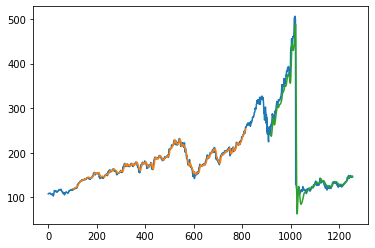

In [46]:
look_back = 100
trainpredictplot = np.empty_like(df1)
trainpredictplot[:,:] = np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:] = train_predict


testpredictplot = np.empty_like(df1)
testpredictplot[:,:] = np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict


plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)

In [47]:
ddf = pd.DataFrame({'Date':df['date']})

In [48]:
ddf['price'] = df['close']

In [49]:
ddf

,Date,price
0,2016-08-10 00:00:00+00:00,108.00
1,2016-08-11 00:00:00+00:00,107.93
2,2016-08-12 00:00:00+00:00,108.18
3,2016-08-15 00:00:00+00:00,109.48
4,2016-08-16 00:00:00+00:00,109.38
...,...,...
1252,2021-08-02 00:00:00+00:00,145.52
1253,2021-08-03 00:00:00+00:00,147.36
1254,2021-08-04 00:00:00+00:00,146.95
1255,2021-08-05 00:00:00+00:00,147.06


In [50]:
train_predict.shape

(716, 1)

In [51]:
test_predict.shape

(339, 1)

In [52]:
717+340

1057

In [53]:
100+717+100+340

1257

## Removing gap from the predictions

In [54]:
training_size = int(len(df)*0.65)
test_size = len(df1) - training_size
train_data,test_data = df1[0:training_size+100,:],df1[training_size:len(df1),:] #time window = 100

In [55]:
train_data.shape, test_data.shape

((917, 1), (440, 1))

In [56]:
def create_dataset(dataset,time_step = 1):

    dataX, dataY = [],[]

    for i in range(len(dataset) - time_step):

        a = dataset[i:(i+time_step),0]   #i = 0 then 0,1,2,3 will be x and y = 4 (if our time step is 4)

        dataX.append(a)

        dataY.append(dataset[i+time_step,0])

    return np.array(dataX), np.array(dataY)



In [57]:
time_step = 100
#Using 100 consecutive values predicting 101th value
#f1-------f100 = X
#f101 = y
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data,time_step)

In [58]:
X_train.shape,X_test.shape

((817, 100), (340, 100))

In [59]:
#Making data 3D
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [60]:
X_train.shape,X_test.shape

((817, 100, 1), (340, 100, 1))

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [62]:
model = Sequential() #sequential model
model.add(LSTM(50,return_sequences = True, input_shape = (100,1))) # input shape of batch
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 100,batch_size = 64, verbose =1)

Epoch 1/100
13/13 [==============================] - 9s 211ms/step - loss: 0.0139 - val_loss: 0.0336
Epoch 2/100
13/13 [==============================] - 2s 127ms/step - loss: 0.0025 - val_loss: 0.0226
Epoch 3/100
13/13 [==============================] - 2s 154ms/step - loss: 0.0011 - val_loss: 0.0227
Epoch 4/100
13/13 [==============================] - 2s 132ms/step - loss: 8.9238e-04 - val_loss: 0.0222
Epoch 5/100
13/13 [==============================] - 2s 130ms/step - loss: 7.9300e-04 - val_loss: 0.0201
Epoch 6/100
13/13 [==============================] - 2s 122ms/step - loss: 7.5073e-04 - val_loss: 0.0194
Epoch 7/100
13/13 [==============================] - 2s 132ms/step - loss: 7.1072e-04 - val_loss: 0.0183
Epoch 8/100
13/13 [==============================] - 2s 157ms/step - loss: 7.5256e-04 - val_loss: 0.0179
Epoch 9/100
13/13 [==============================] - 2s 149ms/step - loss: 6.1256e-04 - val_loss: 0.0177
Epoch 10/100
13/13 [==============================] - 2s 151ms/step

In [65]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [66]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [67]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

194.50573812734825

In [68]:
math.sqrt(mean_squared_error(y_test,test_predict))

221.17770554443396

In [69]:
# Absolute Error
e = math.sqrt(mean_squared_error(y_test,test_predict))
e = np.round(e , 2)
E_pcnt = 100*e/np.mean(y_test)

In [70]:
#np.concatenate(train_predict,test_predict)

In [71]:
a = train_predict.reshape(train_predict.shape[0],)

In [72]:
b = test_predict.reshape(test_predict.shape[0],)

In [73]:
c = list(a)+list(b)

In [74]:
len(c)

1157

In [75]:
c[-1]

146.6237

In [76]:
ddf

,Date,price
0,2016-08-10 00:00:00+00:00,108.00
1,2016-08-11 00:00:00+00:00,107.93
2,2016-08-12 00:00:00+00:00,108.18
3,2016-08-15 00:00:00+00:00,109.48
4,2016-08-16 00:00:00+00:00,109.38
...,...,...
1252,2021-08-02 00:00:00+00:00,145.52
1253,2021-08-03 00:00:00+00:00,147.36
1254,2021-08-04 00:00:00+00:00,146.95
1255,2021-08-05 00:00:00+00:00,147.06


In [77]:
ddf =ddf[100:]

In [78]:
ddf

,Date,price
100,2017-01-03 00:00:00+00:00,116.15
101,2017-01-04 00:00:00+00:00,116.02
102,2017-01-05 00:00:00+00:00,116.61
103,2017-01-06 00:00:00+00:00,117.91
104,2017-01-09 00:00:00+00:00,118.99
...,...,...
1252,2021-08-02 00:00:00+00:00,145.52
1253,2021-08-03 00:00:00+00:00,147.36
1254,2021-08-04 00:00:00+00:00,146.95
1255,2021-08-05 00:00:00+00:00,147.06


In [79]:
len(c)

1157

In [80]:
ddf['Predicted Price'] = c

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
ddf

,Date,price,Predicted Price
100,2017-01-03 00:00:00+00:00,116.15,119.020439
101,2017-01-04 00:00:00+00:00,116.02,118.892677
102,2017-01-05 00:00:00+00:00,116.61,118.742905
103,2017-01-06 00:00:00+00:00,117.91,118.637115
104,2017-01-09 00:00:00+00:00,118.99,118.676987
...,...,...,...
1252,2021-08-02 00:00:00+00:00,145.52,146.817825
1253,2021-08-03 00:00:00+00:00,147.36,146.565826
1254,2021-08-04 00:00:00+00:00,146.95,146.464630
1255,2021-08-05 00:00:00+00:00,147.06,146.496567


<AxesSubplot:>

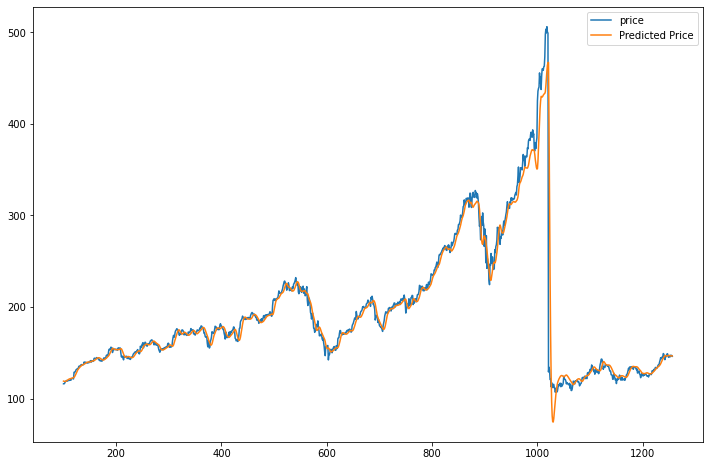

In [82]:
ddf.plot(figsize = (12,8))

In [83]:
ddf["Date"] = pd.to_datetime(ddf['Date'])

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
ddf = ddf.set_index('Date')

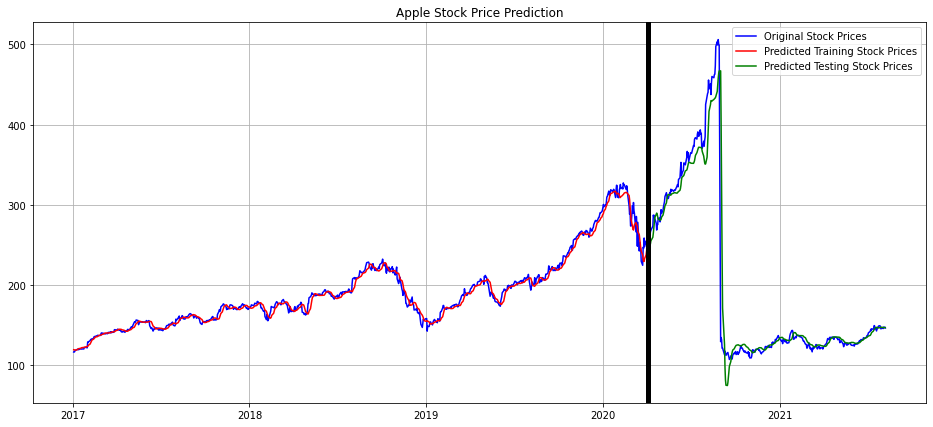

In [85]:
plt.figure(figsize = (16,7))
plt.grid(True)
plt.title('Apple Stock Price Prediction')
plt.plot(ddf.index,ddf['price'],label = "Original Stock Prices",c = 'blue')
plt.plot(ddf[:train_predict.shape[0]].index,ddf['Predicted Price'][:train_predict.shape[0]],label = "Predicted Training Stock Prices",c = 'red')
plt.plot(ddf.index[train_predict.shape[0]:],ddf['Predicted Price'][train_predict.shape[0]:],label = "Predicted Testing Stock Prices", c = 'green')
plt.axvline(ddf.index[train_predict.shape[0]], color='black',lw=5)

plt.legend()

In [86]:
test_predict.shape[0]

340

In [87]:
train_predict.shape[0]

817

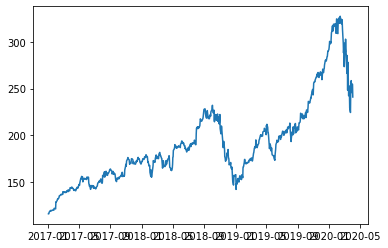

In [88]:
plt.plot(ddf[:train_predict.shape[0]].index,ddf['price'][:train_predict.shape[0]],label = "Original Stock Prices")


## Forecasting: 
- Logics

In [89]:
len(test_data)

440

In [90]:
ddf

,price,Predicted Price
Date,,
2017-01-03 00:00:00+00:00,116.15,119.020439
2017-01-04 00:00:00+00:00,116.02,118.892677
2017-01-05 00:00:00+00:00,116.61,118.742905
2017-01-06 00:00:00+00:00,117.91,118.637115
2017-01-09 00:00:00+00:00,118.99,118.676987
...,...,...
2021-08-02 00:00:00+00:00,145.52,146.817825
2021-08-03 00:00:00+00:00,147.36,146.565826
2021-08-04 00:00:00+00:00,146.95,146.464630


#### Lets say last data is of 22 May, to calculate for 23 day, we need last 100 days data.

In [91]:
test_data.shape

(440, 1)

In [109]:
x_input = test_data[340:].reshape(1,-1)#last 100 days data
x_input.shape

(1, 100)

In [110]:
temp_input = list(x_input)


In [111]:
temp_input = temp_input[0].tolist()

In [112]:
temp_input

[0.05367778439547355,
 0.04318046456223945,
 0.04184038117927341,
 0.05027794322017076,
 0.048168552709946466,
 0.0420885447687116,
 0.043329362715902375,
 0.044867976970418944,
 0.045314671431407605,
 0.04161703394877908,
 0.047200714711137626,
 0.04931010522136198,
 0.05650684931506855,
 0.05727615644232681,
 0.06147012110383171,
 0.06757494540401038,
 0.0741140559857058,
 0.06975878499106619,
 0.07767520349414342,
 0.07171927734762762,
 0.07784891800675009,
 0.07700516180266037,
 0.07869267421083981,
 0.07439944411355975,
 0.07536728211236854,
 0.07149593011713323,
 0.07740222354576137,
 0.07839487790351402,
 0.0775759380583681,
 0.07556581298391907,
 0.07531764939448088,
 0.07030474488783012,
 0.0729849116537622,
 0.06134603930911259,
 0.061966448282707975,
 0.06603633114949381,
 0.06720270001985312,
 0.05886440341473104,
 0.056531665674012355,
 0.048739328965654194,
 0.05419892793329367,
 0.06035338495136,
 0.05742505459598973,
 0.05390113162596788,
 0.05350406988286682,
 0.060005

In [113]:
len(temp_input) #Last 100 hundred days data

100

In [114]:
temp_input #all my last 100 days data from test_data

[0.05367778439547355,
 0.04318046456223945,
 0.04184038117927341,
 0.05027794322017076,
 0.048168552709946466,
 0.0420885447687116,
 0.043329362715902375,
 0.044867976970418944,
 0.045314671431407605,
 0.04161703394877908,
 0.047200714711137626,
 0.04931010522136198,
 0.05650684931506855,
 0.05727615644232681,
 0.06147012110383171,
 0.06757494540401038,
 0.0741140559857058,
 0.06975878499106619,
 0.07767520349414342,
 0.07171927734762762,
 0.07784891800675009,
 0.07700516180266037,
 0.07869267421083981,
 0.07439944411355975,
 0.07536728211236854,
 0.07149593011713323,
 0.07740222354576137,
 0.07839487790351402,
 0.0775759380583681,
 0.07556581298391907,
 0.07531764939448088,
 0.07030474488783012,
 0.0729849116537622,
 0.06134603930911259,
 0.061966448282707975,
 0.06603633114949381,
 0.06720270001985312,
 0.05886440341473104,
 0.056531665674012355,
 0.048739328965654194,
 0.05419892793329367,
 0.06035338495136,
 0.05742505459598973,
 0.05390113162596788,
 0.05350406988286682,
 0.060005

## Demonstrate predictions for next 30 days:

- First time else loop will run, reshape is done and after that it passes to model and prediction is done for 101st day, after that this 101th day data is added in final output. And this 101 day data will be used in previous input list. Now the input list will have 101 elements so the if loop will run and the data for first day is dropped so that we can take data from day 2 to day 101 and predict data for day 102, in a similary way the loops will run for 30 days

- for i = 0 (first loop in while), the else loop will run because 100 elements are present in temp_input. After adding data for 101 day from forecasting, the if loop will run and 1st day data will be excluded

In [152]:
lst_output = []
n_steps = 100
i = 0 
while i<300:   #For 30 days forecast
    if(len(temp_input)>100):
        #print(temp_input)
        x_input = np.array(temp_input[1:]) # Taking x_input values from 2nd value onward, so that total value will be 100
        print('{} day input {}'.format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps,1)) #making tensor of 1 batch, with n rows and 1 column
        #print(x_input)
        yhat = model.predict(x_input,verbose = 1)
        print('{} day output {}'.format(i,yhat))
        temp_input.extend(yhat[0].tolist()) #Adding forecasted value to the temp_input, for further forecasting, now there are 102 values in temp_input
        temp_input = temp_input[1:] #Because after adding the above yhat[0], total number of elements in temp_input is 102, so we will select last 101 elements so that again if loop will go on running for 30 days
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i+1
    else:        #first loop will go inside this
        x_input = x_input.reshape((1,n_steps,1))  #last 100 days data, nsteps = 100 and reshaping it so that we can feed it in LSTM
        yhat = model.predict(x_input,verbose = 0) #Taking prediction from model 
        print(yhat[0])
        temp_input.extend(yhat[0].tolist()) #Adding predicted value of 101 day in temp_input, so that this value can be used for forecasting values for days starting from day 102
        print(len(temp_input))
        lst_output.extend(yhat.tolist())  #Adding 101 day forecast to Output forecasting list 
        i = i+1
        
print(lst_output)
        

0 day input [0.07030474 0.07298491 0.06134604 0.06196645 0.06603633 0.0672027
 0.0588644  0.05653167 0.04873933 0.05419893 0.06035338 0.05742505
 0.05390113 0.05350407 0.06000596 0.05534048 0.05948481 0.05898849
 0.0588644  0.05496824 0.05330554 0.0524866  0.05442228 0.05065019
 0.05648203 0.05650685 0.05859142 0.05955926 0.05702799 0.06010522
 0.06787274 0.06578817 0.0670538  0.07112368 0.06782311 0.07238932
 0.07655847 0.07586361 0.07514393 0.07439944 0.07854378 0.08239031
 0.08395374 0.08472305 0.09139865 0.09651082 0.10283899 0.09953842
 0.10417907 0.10266528 0.10549434 0.11420488 0.11254219 0.10735557
 0.09757792 0.10675998 0.10489875 0.10837304 0.11274072 0.11380782
 0.10829859 0.10385646 0.10549434 0.1060403  0.10519655 0.10976276
 0.10874528 0.10901826 0.10673516 0.10818922 0.10841472 0.10863098
 0.10884857 0.10907169 0.1093009  0.10953522 0.10977333 0.11001386
 0.11025579 0.11049835 0.11074094 0.11098318 0.11122469 0.11146522
 0.11170455 0.1119425  0.11217888 0.1124136  0.1126

1/1 [==============================] - 0s 45ms/step
6 day output [[0.11646406]]
7 day input [0.05653167 0.04873933 0.05419893 0.06035338 0.05742505 0.05390113
 0.05350407 0.06000596 0.05534048 0.05948481 0.05898849 0.0588644
 0.05496824 0.05330554 0.0524866  0.05442228 0.05065019 0.05648203
 0.05650685 0.05859142 0.05955926 0.05702799 0.06010522 0.06787274
 0.06578817 0.0670538  0.07112368 0.06782311 0.07238932 0.07655847
 0.07586361 0.07514393 0.07439944 0.07854378 0.08239031 0.08395374
 0.08472305 0.09139865 0.09651082 0.10283899 0.09953842 0.10417907
 0.10266528 0.10549434 0.11420488 0.11254219 0.10735557 0.09757792
 0.10675998 0.10489875 0.10837304 0.11274072 0.11380782 0.10829859
 0.10385646 0.10549434 0.1060403  0.10519655 0.10976276 0.10874528
 0.10901826 0.10673516 0.10818922 0.10841472 0.10863098 0.10884857
 0.10907169 0.1093009  0.10953522 0.10977333 0.11001386 0.11025579
 0.11049835 0.11074094 0.11098318 0.11122469 0.11146522 0.11170455
 0.1119425  0.11217888 0.1124136  0.11

1/1 [==============================] - 0s 53ms/step
13 day output [[0.1177543]]
14 day input [0.06000596 0.05534048 0.05948481 0.05898849 0.0588644  0.05496824
 0.05330554 0.0524866  0.05442228 0.05065019 0.05648203 0.05650685
 0.05859142 0.05955926 0.05702799 0.06010522 0.06787274 0.06578817
 0.0670538  0.07112368 0.06782311 0.07238932 0.07655847 0.07586361
 0.07514393 0.07439944 0.07854378 0.08239031 0.08395374 0.08472305
 0.09139865 0.09651082 0.10283899 0.09953842 0.10417907 0.10266528
 0.10549434 0.11420488 0.11254219 0.10735557 0.09757792 0.10675998
 0.10489875 0.10837304 0.11274072 0.11380782 0.10829859 0.10385646
 0.10549434 0.1060403  0.10519655 0.10976276 0.10874528 0.10901826
 0.10673516 0.10818922 0.10841472 0.10863098 0.10884857 0.10907169
 0.1093009  0.10953522 0.10977333 0.11001386 0.11025579 0.11049835
 0.11074094 0.11098318 0.11122469 0.11146522 0.11170455 0.1119425
 0.11217888 0.1124136  0.1126465  0.11287749 0.11310648 0.1133334
 0.11355817 0.11378075 0.11400104 0.11

1/1 [==============================] - 0s 44ms/step
20 day output [[0.11895043]]
21 day input [0.0524866  0.05442228 0.05065019 0.05648203 0.05650685 0.05859142
 0.05955926 0.05702799 0.06010522 0.06787274 0.06578817 0.0670538
 0.07112368 0.06782311 0.07238932 0.07655847 0.07586361 0.07514393
 0.07439944 0.07854378 0.08239031 0.08395374 0.08472305 0.09139865
 0.09651082 0.10283899 0.09953842 0.10417907 0.10266528 0.10549434
 0.11420488 0.11254219 0.10735557 0.09757792 0.10675998 0.10489875
 0.10837304 0.11274072 0.11380782 0.10829859 0.10385646 0.10549434
 0.1060403  0.10519655 0.10976276 0.10874528 0.10901826 0.10673516
 0.10818922 0.10841472 0.10863098 0.10884857 0.10907169 0.1093009
 0.10953522 0.10977333 0.11001386 0.11025579 0.11049835 0.11074094
 0.11098318 0.11122469 0.11146522 0.11170455 0.1119425  0.11217888
 0.1124136  0.1126465  0.11287749 0.11310648 0.1133334  0.11355817
 0.11378075 0.11400104 0.11421907 0.11443476 0.11464812 0.11485915
 0.11506783 0.11527418 0.1154782  0.1

1/1 [==============================] - 0s 52ms/step
27 day output [[0.12006261]]
28 day input [0.05702799 0.06010522 0.06787274 0.06578817 0.0670538  0.07112368
 0.06782311 0.07238932 0.07655847 0.07586361 0.07514393 0.07439944
 0.07854378 0.08239031 0.08395374 0.08472305 0.09139865 0.09651082
 0.10283899 0.09953842 0.10417907 0.10266528 0.10549434 0.11420488
 0.11254219 0.10735557 0.09757792 0.10675998 0.10489875 0.10837304
 0.11274072 0.11380782 0.10829859 0.10385646 0.10549434 0.1060403
 0.10519655 0.10976276 0.10874528 0.10901826 0.10673516 0.10818922
 0.10841472 0.10863098 0.10884857 0.10907169 0.1093009  0.10953522
 0.10977333 0.11001386 0.11025579 0.11049835 0.11074094 0.11098318
 0.11122469 0.11146522 0.11170455 0.1119425  0.11217888 0.1124136
 0.1126465  0.11287749 0.11310648 0.1133334  0.11355817 0.11378075
 0.11400104 0.11421907 0.11443476 0.11464812 0.11485915 0.11506783
 0.11527418 0.1154782  0.11567988 0.11587928 0.11607643 0.11627135
 0.11646406 0.1166546  0.116843   0.1

1/1 [==============================] - 0s 47ms/step
34 day output [[0.12109862]]
35 day input [0.07238932 0.07655847 0.07586361 0.07514393 0.07439944 0.07854378
 0.08239031 0.08395374 0.08472305 0.09139865 0.09651082 0.10283899
 0.09953842 0.10417907 0.10266528 0.10549434 0.11420488 0.11254219
 0.10735557 0.09757792 0.10675998 0.10489875 0.10837304 0.11274072
 0.11380782 0.10829859 0.10385646 0.10549434 0.1060403  0.10519655
 0.10976276 0.10874528 0.10901826 0.10673516 0.10818922 0.10841472
 0.10863098 0.10884857 0.10907169 0.1093009  0.10953522 0.10977333
 0.11001386 0.11025579 0.11049835 0.11074094 0.11098318 0.11122469
 0.11146522 0.11170455 0.1119425  0.11217888 0.1124136  0.1126465
 0.11287749 0.11310648 0.1133334  0.11355817 0.11378075 0.11400104
 0.11421907 0.11443476 0.11464812 0.11485915 0.11506783 0.11527418
 0.1154782  0.11567988 0.11587928 0.11607643 0.11627135 0.11646406
 0.1166546  0.116843   0.11702931 0.11721357 0.1173958  0.11757603
 0.1177543  0.1179307  0.11810517 0.

1/1 [==============================] - 0s 29ms/step
41 day output [[0.12206443]]
42 day input [0.08395374 0.08472305 0.09139865 0.09651082 0.10283899 0.09953842
 0.10417907 0.10266528 0.10549434 0.11420488 0.11254219 0.10735557
 0.09757792 0.10675998 0.10489875 0.10837304 0.11274072 0.11380782
 0.10829859 0.10385646 0.10549434 0.1060403  0.10519655 0.10976276
 0.10874528 0.10901826 0.10673516 0.10818922 0.10841472 0.10863098
 0.10884857 0.10907169 0.1093009  0.10953522 0.10977333 0.11001386
 0.11025579 0.11049835 0.11074094 0.11098318 0.11122469 0.11146522
 0.11170455 0.1119425  0.11217888 0.1124136  0.1126465  0.11287749
 0.11310648 0.1133334  0.11355817 0.11378075 0.11400104 0.11421907
 0.11443476 0.11464812 0.11485915 0.11506783 0.11527418 0.1154782
 0.11567988 0.11587928 0.11607643 0.11627135 0.11646406 0.1166546
 0.116843   0.11702931 0.11721357 0.1173958  0.11757603 0.1177543
 0.1179307  0.11810517 0.11827782 0.11844862 0.11861763 0.1187849
 0.11895043 0.11911423 0.11927637 0.119

1/1 [==============================] - 0s 46ms/step
48 day output [[0.12296521]]
49 day input [0.10266528 0.10549434 0.11420488 0.11254219 0.10735557 0.09757792
 0.10675998 0.10489875 0.10837304 0.11274072 0.11380782 0.10829859
 0.10385646 0.10549434 0.1060403  0.10519655 0.10976276 0.10874528
 0.10901826 0.10673516 0.10818922 0.10841472 0.10863098 0.10884857
 0.10907169 0.1093009  0.10953522 0.10977333 0.11001386 0.11025579
 0.11049835 0.11074094 0.11098318 0.11122469 0.11146522 0.11170455
 0.1119425  0.11217888 0.1124136  0.1126465  0.11287749 0.11310648
 0.1133334  0.11355817 0.11378075 0.11400104 0.11421907 0.11443476
 0.11464812 0.11485915 0.11506783 0.11527418 0.1154782  0.11567988
 0.11587928 0.11607643 0.11627135 0.11646406 0.1166546  0.116843
 0.11702931 0.11721357 0.1173958  0.11757603 0.1177543  0.1179307
 0.11810517 0.11827782 0.11844862 0.11861763 0.1187849  0.11895043
 0.11911423 0.11927637 0.11943685 0.11959567 0.1197529  0.11990853
 0.12006261 0.1202151  0.12036608 0.12

1/1 [==============================] - 0s 45ms/step
55 day output [[0.12380555]]
56 day input [0.10489875 0.10837304 0.11274072 0.11380782 0.10829859 0.10385646
 0.10549434 0.1060403  0.10519655 0.10976276 0.10874528 0.10901826
 0.10673516 0.10818922 0.10841472 0.10863098 0.10884857 0.10907169
 0.1093009  0.10953522 0.10977333 0.11001386 0.11025579 0.11049835
 0.11074094 0.11098318 0.11122469 0.11146522 0.11170455 0.1119425
 0.11217888 0.1124136  0.1126465  0.11287749 0.11310648 0.1133334
 0.11355817 0.11378075 0.11400104 0.11421907 0.11443476 0.11464812
 0.11485915 0.11506783 0.11527418 0.1154782  0.11567988 0.11587928
 0.11607643 0.11627135 0.11646406 0.1166546  0.116843   0.11702931
 0.11721357 0.1173958  0.11757603 0.1177543  0.1179307  0.11810517
 0.11827782 0.11844862 0.11861763 0.1187849  0.11895043 0.11911423
 0.11927637 0.11943685 0.11959567 0.1197529  0.11990853 0.12006261
 0.1202151  0.12036608 0.12051555 0.12066351 0.12080996 0.12095502
 0.12109862 0.12124074 0.12138146 0.1

1/1 [==============================] - 0s 41ms/step
62 day output [[0.12458973]]
63 day input [0.1060403  0.10519655 0.10976276 0.10874528 0.10901826 0.10673516
 0.10818922 0.10841472 0.10863098 0.10884857 0.10907169 0.1093009
 0.10953522 0.10977333 0.11001386 0.11025579 0.11049835 0.11074094
 0.11098318 0.11122469 0.11146522 0.11170455 0.1119425  0.11217888
 0.1124136  0.1126465  0.11287749 0.11310648 0.1133334  0.11355817
 0.11378075 0.11400104 0.11421907 0.11443476 0.11464812 0.11485915
 0.11506783 0.11527418 0.1154782  0.11567988 0.11587928 0.11607643
 0.11627135 0.11646406 0.1166546  0.116843   0.11702931 0.11721357
 0.1173958  0.11757603 0.1177543  0.1179307  0.11810517 0.11827782
 0.11844862 0.11861763 0.1187849  0.11895043 0.11911423 0.11927637
 0.11943685 0.11959567 0.1197529  0.11990853 0.12006261 0.1202151
 0.12036608 0.12051555 0.12066351 0.12080996 0.12095502 0.12109862
 0.12124074 0.12138146 0.1215208  0.12165874 0.12179534 0.12193055
 0.12206443 0.12219699 0.12232824 0.1

1/1 [==============================] - 0s 20ms/step
69 day output [[0.12532172]]
70 day input [0.10841472 0.10863098 0.10884857 0.10907169 0.1093009  0.10953522
 0.10977333 0.11001386 0.11025579 0.11049835 0.11074094 0.11098318
 0.11122469 0.11146522 0.11170455 0.1119425  0.11217888 0.1124136
 0.1126465  0.11287749 0.11310648 0.1133334  0.11355817 0.11378075
 0.11400104 0.11421907 0.11443476 0.11464812 0.11485915 0.11506783
 0.11527418 0.1154782  0.11567988 0.11587928 0.11607643 0.11627135
 0.11646406 0.1166546  0.116843   0.11702931 0.11721357 0.1173958
 0.11757603 0.1177543  0.1179307  0.11810517 0.11827782 0.11844862
 0.11861763 0.1187849  0.11895043 0.11911423 0.11927637 0.11943685
 0.11959567 0.1197529  0.11990853 0.12006261 0.1202151  0.12036608
 0.12051555 0.12066351 0.12080996 0.12095502 0.12109862 0.12124074
 0.12138146 0.1215208  0.12165874 0.12179534 0.12193055 0.12206443
 0.12219699 0.12232824 0.12245817 0.12258682 0.1227142  0.12284033
 0.12296521 0.12308885 0.12321129 0.1

1/1 [==============================] - 0s 21ms/step
76 day output [[0.12600517]]
77 day input [0.11001386 0.11025579 0.11049835 0.11074094 0.11098318 0.11122469
 0.11146522 0.11170455 0.1119425  0.11217888 0.1124136  0.1126465
 0.11287749 0.11310648 0.1133334  0.11355817 0.11378075 0.11400104
 0.11421907 0.11443476 0.11464812 0.11485915 0.11506783 0.11527418
 0.1154782  0.11567988 0.11587928 0.11607643 0.11627135 0.11646406
 0.1166546  0.116843   0.11702931 0.11721357 0.1173958  0.11757603
 0.1177543  0.1179307  0.11810517 0.11827782 0.11844862 0.11861763
 0.1187849  0.11895043 0.11911423 0.11927637 0.11943685 0.11959567
 0.1197529  0.11990853 0.12006261 0.1202151  0.12036608 0.12051555
 0.12066351 0.12080996 0.12095502 0.12109862 0.12124074 0.12138146
 0.1215208  0.12165874 0.12179534 0.12193055 0.12206443 0.12219699
 0.12232824 0.12245817 0.12258682 0.1227142  0.12284033 0.12296521
 0.12308885 0.12321129 0.12333249 0.12345254 0.12357136 0.12368905
 0.12380555 0.12392092 0.12403515 0.

1/1 [==============================] - 0s 18ms/step
83 day output [[0.12664352]]
84 day input [0.11170455 0.1119425  0.11217888 0.1124136  0.1126465  0.11287749
 0.11310648 0.1133334  0.11355817 0.11378075 0.11400104 0.11421907
 0.11443476 0.11464812 0.11485915 0.11506783 0.11527418 0.1154782
 0.11567988 0.11587928 0.11607643 0.11627135 0.11646406 0.1166546
 0.116843   0.11702931 0.11721357 0.1173958  0.11757603 0.1177543
 0.1179307  0.11810517 0.11827782 0.11844862 0.11861763 0.1187849
 0.11895043 0.11911423 0.11927637 0.11943685 0.11959567 0.1197529
 0.11990853 0.12006261 0.1202151  0.12036608 0.12051555 0.12066351
 0.12080996 0.12095502 0.12109862 0.12124074 0.12138146 0.1215208
 0.12165874 0.12179534 0.12193055 0.12206443 0.12219699 0.12232824
 0.12245817 0.12258682 0.1227142  0.12284033 0.12296521 0.12308885
 0.12321129 0.12333249 0.12345254 0.12357136 0.12368905 0.12380555
 0.12392092 0.12403515 0.12414829 0.12426026 0.12437117 0.12448099
 0.12458973 0.12469742 0.12480401 0.12490

1/1 [==============================] - 0s 24ms/step
90 day output [[0.12723988]]
91 day input [0.1133334  0.11355817 0.11378075 0.11400104 0.11421907 0.11443476
 0.11464812 0.11485915 0.11506783 0.11527418 0.1154782  0.11567988
 0.11587928 0.11607643 0.11627135 0.11646406 0.1166546  0.116843
 0.11702931 0.11721357 0.1173958  0.11757603 0.1177543  0.1179307
 0.11810517 0.11827782 0.11844862 0.11861763 0.1187849  0.11895043
 0.11911423 0.11927637 0.11943685 0.11959567 0.1197529  0.11990853
 0.12006261 0.1202151  0.12036608 0.12051555 0.12066351 0.12080996
 0.12095502 0.12109862 0.12124074 0.12138146 0.1215208  0.12165874
 0.12179534 0.12193055 0.12206443 0.12219699 0.12232824 0.12245817
 0.12258682 0.1227142  0.12284033 0.12296521 0.12308885 0.12321129
 0.12333249 0.12345254 0.12357136 0.12368905 0.12380555 0.12392092
 0.12403515 0.12414829 0.12426026 0.12437117 0.12448099 0.12458973
 0.12469742 0.12480401 0.12490959 0.12501416 0.12511769 0.12522019
 0.12532172 0.12542225 0.12552179 0.12

1/1 [==============================] - 0s 20ms/step
97 day output [[0.12779711]]
98 day input [0.11485915 0.11506783 0.11527418 0.1154782  0.11567988 0.11587928
 0.11607643 0.11627135 0.11646406 0.1166546  0.116843   0.11702931
 0.11721357 0.1173958  0.11757603 0.1177543  0.1179307  0.11810517
 0.11827782 0.11844862 0.11861763 0.1187849  0.11895043 0.11911423
 0.11927637 0.11943685 0.11959567 0.1197529  0.11990853 0.12006261
 0.1202151  0.12036608 0.12051555 0.12066351 0.12080996 0.12095502
 0.12109862 0.12124074 0.12138146 0.1215208  0.12165874 0.12179534
 0.12193055 0.12206443 0.12219699 0.12232824 0.12245817 0.12258682
 0.1227142  0.12284033 0.12296521 0.12308885 0.12321129 0.12333249
 0.12345254 0.12357136 0.12368905 0.12380555 0.12392092 0.12403515
 0.12414829 0.12426026 0.12437117 0.12448099 0.12458973 0.12469742
 0.12480401 0.12490959 0.12501416 0.12511769 0.12522019 0.12532172
 0.12542225 0.12552179 0.12562038 0.12571797 0.12581466 0.12591037
 0.12600517 0.12609906 0.12619202 0

1/1 [==============================] - 0s 21ms/step
104 day output [[0.12831795]]
105 day input [0.11627135 0.11646406 0.1166546  0.116843   0.11702931 0.11721357
 0.1173958  0.11757603 0.1177543  0.1179307  0.11810517 0.11827782
 0.11844862 0.11861763 0.1187849  0.11895043 0.11911423 0.11927637
 0.11943685 0.11959567 0.1197529  0.11990853 0.12006261 0.1202151
 0.12036608 0.12051555 0.12066351 0.12080996 0.12095502 0.12109862
 0.12124074 0.12138146 0.1215208  0.12165874 0.12179534 0.12193055
 0.12206443 0.12219699 0.12232824 0.12245817 0.12258682 0.1227142
 0.12284033 0.12296521 0.12308885 0.12321129 0.12333249 0.12345254
 0.12357136 0.12368905 0.12380555 0.12392092 0.12403515 0.12414829
 0.12426026 0.12437117 0.12448099 0.12458973 0.12469742 0.12480401
 0.12490959 0.12501416 0.12511769 0.12522019 0.12532172 0.12542225
 0.12552179 0.12562038 0.12571797 0.12581466 0.12591037 0.12600517
 0.12609906 0.12619202 0.12628409 0.12637527 0.12646556 0.12655497
 0.12664352 0.12673125 0.12681805 0

1/1 [==============================] - 0s 21ms/step
111 day output [[0.12880488]]
112 day input [0.11757603 0.1177543  0.1179307  0.11810517 0.11827782 0.11844862
 0.11861763 0.1187849  0.11895043 0.11911423 0.11927637 0.11943685
 0.11959567 0.1197529  0.11990853 0.12006261 0.1202151  0.12036608
 0.12051555 0.12066351 0.12080996 0.12095502 0.12109862 0.12124074
 0.12138146 0.1215208  0.12165874 0.12179534 0.12193055 0.12206443
 0.12219699 0.12232824 0.12245817 0.12258682 0.1227142  0.12284033
 0.12296521 0.12308885 0.12321129 0.12333249 0.12345254 0.12357136
 0.12368905 0.12380555 0.12392092 0.12403515 0.12414829 0.12426026
 0.12437117 0.12448099 0.12458973 0.12469742 0.12480401 0.12490959
 0.12501416 0.12511769 0.12522019 0.12532172 0.12542225 0.12552179
 0.12562038 0.12571797 0.12581466 0.12591037 0.12600517 0.12609906
 0.12619202 0.12628409 0.12637527 0.12646556 0.12655497 0.12664352
 0.12673125 0.12681805 0.12690404 0.12698926 0.1270736  0.12715714
 0.12723988 0.12732179 0.12740295

1/1 [==============================] - 0s 26ms/step
118 day output [[0.1292602]]
119 day input [0.1187849  0.11895043 0.11911423 0.11927637 0.11943685 0.11959567
 0.1197529  0.11990853 0.12006261 0.1202151  0.12036608 0.12051555
 0.12066351 0.12080996 0.12095502 0.12109862 0.12124074 0.12138146
 0.1215208  0.12165874 0.12179534 0.12193055 0.12206443 0.12219699
 0.12232824 0.12245817 0.12258682 0.1227142  0.12284033 0.12296521
 0.12308885 0.12321129 0.12333249 0.12345254 0.12357136 0.12368905
 0.12380555 0.12392092 0.12403515 0.12414829 0.12426026 0.12437117
 0.12448099 0.12458973 0.12469742 0.12480401 0.12490959 0.12501416
 0.12511769 0.12522019 0.12532172 0.12542225 0.12552179 0.12562038
 0.12571797 0.12581466 0.12591037 0.12600517 0.12609906 0.12619202
 0.12628409 0.12637527 0.12646556 0.12655497 0.12664352 0.12673125
 0.12681805 0.12690404 0.12698926 0.1270736  0.12715714 0.12723988
 0.12732179 0.12740295 0.12748331 0.12756291 0.12764171 0.12771979
 0.12779711 0.12787367 0.12794951 

1/1 [==============================] - 0s 19ms/step
125 day output [[0.12968601]]
126 day input [0.11990853 0.12006261 0.1202151  0.12036608 0.12051555 0.12066351
 0.12080996 0.12095502 0.12109862 0.12124074 0.12138146 0.1215208
 0.12165874 0.12179534 0.12193055 0.12206443 0.12219699 0.12232824
 0.12245817 0.12258682 0.1227142  0.12284033 0.12296521 0.12308885
 0.12321129 0.12333249 0.12345254 0.12357136 0.12368905 0.12380555
 0.12392092 0.12403515 0.12414829 0.12426026 0.12437117 0.12448099
 0.12458973 0.12469742 0.12480401 0.12490959 0.12501416 0.12511769
 0.12522019 0.12532172 0.12542225 0.12552179 0.12562038 0.12571797
 0.12581466 0.12591037 0.12600517 0.12609906 0.12619202 0.12628409
 0.12637527 0.12646556 0.12655497 0.12664352 0.12673125 0.12681805
 0.12690404 0.12698926 0.1270736  0.12715714 0.12723988 0.12732179
 0.12740295 0.12748331 0.12756291 0.12764171 0.12771979 0.12779711
 0.12787367 0.12794951 0.12802464 0.12809902 0.12817271 0.1282457
 0.12831795 0.12838955 0.12846042 0

1/1 [==============================] - 0s 19ms/step
132 day output [[0.13008435]]
133 day input [0.12095502 0.12109862 0.12124074 0.12138146 0.1215208  0.12165874
 0.12179534 0.12193055 0.12206443 0.12219699 0.12232824 0.12245817
 0.12258682 0.1227142  0.12284033 0.12296521 0.12308885 0.12321129
 0.12333249 0.12345254 0.12357136 0.12368905 0.12380555 0.12392092
 0.12403515 0.12414829 0.12426026 0.12437117 0.12448099 0.12458973
 0.12469742 0.12480401 0.12490959 0.12501416 0.12511769 0.12522019
 0.12532172 0.12542225 0.12552179 0.12562038 0.12571797 0.12581466
 0.12591037 0.12600517 0.12609906 0.12619202 0.12628409 0.12637527
 0.12646556 0.12655497 0.12664352 0.12673125 0.12681805 0.12690404
 0.12698926 0.1270736  0.12715714 0.12723988 0.12732179 0.12740295
 0.12748331 0.12756291 0.12764171 0.12771979 0.12779711 0.12787367
 0.12794951 0.12802464 0.12809902 0.12817271 0.1282457  0.12831795
 0.12838955 0.12846042 0.12853067 0.12860021 0.12866908 0.12873732
 0.12880488 0.1288718  0.12893811

1/1 [==============================] - 0s 20ms/step
139 day output [[0.13045698]]
140 day input [0.12193055 0.12206443 0.12219699 0.12232824 0.12245817 0.12258682
 0.1227142  0.12284033 0.12296521 0.12308885 0.12321129 0.12333249
 0.12345254 0.12357136 0.12368905 0.12380555 0.12392092 0.12403515
 0.12414829 0.12426026 0.12437117 0.12448099 0.12458973 0.12469742
 0.12480401 0.12490959 0.12501416 0.12511769 0.12522019 0.12532172
 0.12542225 0.12552179 0.12562038 0.12571797 0.12581466 0.12591037
 0.12600517 0.12609906 0.12619202 0.12628409 0.12637527 0.12646556
 0.12655497 0.12664352 0.12673125 0.12681805 0.12690404 0.12698926
 0.1270736  0.12715714 0.12723988 0.12732179 0.12740295 0.12748331
 0.12756291 0.12764171 0.12771979 0.12779711 0.12787367 0.12794951
 0.12802464 0.12809902 0.12817271 0.1282457  0.12831795 0.12838955
 0.12846042 0.12853067 0.12860021 0.12866908 0.12873732 0.12880488
 0.1288718  0.12893811 0.12900376 0.12906879 0.12913319 0.12919699
 0.1292602  0.12932278 0.12938476

1/1 [==============================] - 0s 20ms/step
146 day output [[0.13080567]]
147 day input [0.12284033 0.12296521 0.12308885 0.12321129 0.12333249 0.12345254
 0.12357136 0.12368905 0.12380555 0.12392092 0.12403515 0.12414829
 0.12426026 0.12437117 0.12448099 0.12458973 0.12469742 0.12480401
 0.12490959 0.12501416 0.12511769 0.12522019 0.12532172 0.12542225
 0.12552179 0.12562038 0.12571797 0.12581466 0.12591037 0.12600517
 0.12609906 0.12619202 0.12628409 0.12637527 0.12646556 0.12655497
 0.12664352 0.12673125 0.12681805 0.12690404 0.12698926 0.1270736
 0.12715714 0.12723988 0.12732179 0.12740295 0.12748331 0.12756291
 0.12764171 0.12771979 0.12779711 0.12787367 0.12794951 0.12802464
 0.12809902 0.12817271 0.1282457  0.12831795 0.12838955 0.12846042
 0.12853067 0.12860021 0.12866908 0.12873732 0.12880488 0.1288718
 0.12893811 0.12900376 0.12906879 0.12913319 0.12919699 0.1292602
 0.12932278 0.12938476 0.12944616 0.12950701 0.12956725 0.1296269
 0.12968601 0.12974456 0.12980254 0.1

1/1 [==============================] - 0s 19ms/step
153 day output [[0.131132]]
154 day input [0.12368905 0.12380555 0.12392092 0.12403515 0.12414829 0.12426026
 0.12437117 0.12448099 0.12458973 0.12469742 0.12480401 0.12490959
 0.12501416 0.12511769 0.12522019 0.12532172 0.12542225 0.12552179
 0.12562038 0.12571797 0.12581466 0.12591037 0.12600517 0.12609906
 0.12619202 0.12628409 0.12637527 0.12646556 0.12655497 0.12664352
 0.12673125 0.12681805 0.12690404 0.12698926 0.1270736  0.12715714
 0.12723988 0.12732179 0.12740295 0.12748331 0.12756291 0.12764171
 0.12771979 0.12779711 0.12787367 0.12794951 0.12802464 0.12809902
 0.12817271 0.1282457  0.12831795 0.12838955 0.12846042 0.12853067
 0.12860021 0.12866908 0.12873732 0.12880488 0.1288718  0.12893811
 0.12900376 0.12906879 0.12913319 0.12919699 0.1292602  0.12932278
 0.12938476 0.12944616 0.12950701 0.12956725 0.1296269  0.12968601
 0.12974456 0.12980254 0.12985998 0.12991688 0.12997323 0.13002905
 0.13008435 0.13013911 0.13019338 0

1/1 [==============================] - 0s 29ms/step
160 day output [[0.13143744]]
161 day input [0.12448099 0.12458973 0.12469742 0.12480401 0.12490959 0.12501416
 0.12511769 0.12522019 0.12532172 0.12542225 0.12552179 0.12562038
 0.12571797 0.12581466 0.12591037 0.12600517 0.12609906 0.12619202
 0.12628409 0.12637527 0.12646556 0.12655497 0.12664352 0.12673125
 0.12681805 0.12690404 0.12698926 0.1270736  0.12715714 0.12723988
 0.12732179 0.12740295 0.12748331 0.12756291 0.12764171 0.12771979
 0.12779711 0.12787367 0.12794951 0.12802464 0.12809902 0.12817271
 0.1282457  0.12831795 0.12838955 0.12846042 0.12853067 0.12860021
 0.12866908 0.12873732 0.12880488 0.1288718  0.12893811 0.12900376
 0.12906879 0.12913319 0.12919699 0.1292602  0.12932278 0.12938476
 0.12944616 0.12950701 0.12956725 0.1296269  0.12968601 0.12974456
 0.12980254 0.12985998 0.12991688 0.12997323 0.13002905 0.13008435
 0.13013911 0.13019338 0.13024712 0.13030031 0.13035306 0.13040528
 0.13045698 0.13050826 0.130559  

1/1 [==============================] - 0s 16ms/step
167 day output [[0.13172331]]
168 day input [0.12522019 0.12532172 0.12542225 0.12552179 0.12562038 0.12571797
 0.12581466 0.12591037 0.12600517 0.12609906 0.12619202 0.12628409
 0.12637527 0.12646556 0.12655497 0.12664352 0.12673125 0.12681805
 0.12690404 0.12698926 0.1270736  0.12715714 0.12723988 0.12732179
 0.12740295 0.12748331 0.12756291 0.12764171 0.12771979 0.12779711
 0.12787367 0.12794951 0.12802464 0.12809902 0.12817271 0.1282457
 0.12831795 0.12838955 0.12846042 0.12853067 0.12860021 0.12866908
 0.12873732 0.12880488 0.1288718  0.12893811 0.12900376 0.12906879
 0.12913319 0.12919699 0.1292602  0.12932278 0.12938476 0.12944616
 0.12950701 0.12956725 0.1296269  0.12968601 0.12974456 0.12980254
 0.12985998 0.12991688 0.12997323 0.13002905 0.13008435 0.13013911
 0.13019338 0.13024712 0.13030031 0.13035306 0.13040528 0.13045698
 0.13050826 0.130559   0.13060927 0.13065909 0.13070841 0.13075726
 0.13080567 0.13085362 0.13090113 

1/1 [==============================] - 0s 17ms/step
174 day output [[0.13199097]]
175 day input [0.12591037 0.12600517 0.12609906 0.12619202 0.12628409 0.12637527
 0.12646556 0.12655497 0.12664352 0.12673125 0.12681805 0.12690404
 0.12698926 0.1270736  0.12715714 0.12723988 0.12732179 0.12740295
 0.12748331 0.12756291 0.12764171 0.12771979 0.12779711 0.12787367
 0.12794951 0.12802464 0.12809902 0.12817271 0.1282457  0.12831795
 0.12838955 0.12846042 0.12853067 0.12860021 0.12866908 0.12873732
 0.12880488 0.1288718  0.12893811 0.12900376 0.12906879 0.12913319
 0.12919699 0.1292602  0.12932278 0.12938476 0.12944616 0.12950701
 0.12956725 0.1296269  0.12968601 0.12974456 0.12980254 0.12985998
 0.12991688 0.12997323 0.13002905 0.13008435 0.13013911 0.13019338
 0.13024712 0.13030031 0.13035306 0.13040528 0.13045698 0.13050826
 0.130559   0.13060927 0.13065909 0.13070841 0.13075726 0.13080567
 0.13085362 0.13090113 0.13094817 0.13099478 0.13104096 0.13108669
 0.13113201 0.13117687 0.13122134

1/1 [==============================] - 0s 17ms/step
181 day output [[0.13224155]]
182 day input [0.12655497 0.12664352 0.12673125 0.12681805 0.12690404 0.12698926
 0.1270736  0.12715714 0.12723988 0.12732179 0.12740295 0.12748331
 0.12756291 0.12764171 0.12771979 0.12779711 0.12787367 0.12794951
 0.12802464 0.12809902 0.12817271 0.1282457  0.12831795 0.12838955
 0.12846042 0.12853067 0.12860021 0.12866908 0.12873732 0.12880488
 0.1288718  0.12893811 0.12900376 0.12906879 0.12913319 0.12919699
 0.1292602  0.12932278 0.12938476 0.12944616 0.12950701 0.12956725
 0.1296269  0.12968601 0.12974456 0.12980254 0.12985998 0.12991688
 0.12997323 0.13002905 0.13008435 0.13013911 0.13019338 0.13024712
 0.13030031 0.13035306 0.13040528 0.13045698 0.13050826 0.130559
 0.13060927 0.13065909 0.13070841 0.13075726 0.13080567 0.13085362
 0.13090113 0.13094817 0.13099478 0.13104096 0.13108669 0.13113201
 0.13117687 0.13122134 0.13126536 0.13130899 0.1313522  0.13139503
 0.13143744 0.13147943 0.13152103 0

1/1 [==============================] - 0s 20ms/step
188 day output [[0.13247624]]
189 day input [0.12715714 0.12723988 0.12732179 0.12740295 0.12748331 0.12756291
 0.12764171 0.12771979 0.12779711 0.12787367 0.12794951 0.12802464
 0.12809902 0.12817271 0.1282457  0.12831795 0.12838955 0.12846042
 0.12853067 0.12860021 0.12866908 0.12873732 0.12880488 0.1288718
 0.12893811 0.12900376 0.12906879 0.12913319 0.12919699 0.1292602
 0.12932278 0.12938476 0.12944616 0.12950701 0.12956725 0.1296269
 0.12968601 0.12974456 0.12980254 0.12985998 0.12991688 0.12997323
 0.13002905 0.13008435 0.13013911 0.13019338 0.13024712 0.13030031
 0.13035306 0.13040528 0.13045698 0.13050826 0.130559   0.13060927
 0.13065909 0.13070841 0.13075726 0.13080567 0.13085362 0.13090113
 0.13094817 0.13099478 0.13104096 0.13108669 0.13113201 0.13117687
 0.13122134 0.13126536 0.13130899 0.1313522  0.13139503 0.13143744
 0.13147943 0.13152103 0.13156225 0.13160311 0.13164355 0.13168362
 0.13172331 0.13176264 0.13180159 0.

1/1 [==============================] - 0s 18ms/step
195 day output [[0.13269597]]
196 day input [0.12771979 0.12779711 0.12787367 0.12794951 0.12802464 0.12809902
 0.12817271 0.1282457  0.12831795 0.12838955 0.12846042 0.12853067
 0.12860021 0.12866908 0.12873732 0.12880488 0.1288718  0.12893811
 0.12900376 0.12906879 0.12913319 0.12919699 0.1292602  0.12932278
 0.12938476 0.12944616 0.12950701 0.12956725 0.1296269  0.12968601
 0.12974456 0.12980254 0.12985998 0.12991688 0.12997323 0.13002905
 0.13008435 0.13013911 0.13019338 0.13024712 0.13030031 0.13035306
 0.13040528 0.13045698 0.13050826 0.130559   0.13060927 0.13065909
 0.13070841 0.13075726 0.13080567 0.13085362 0.13090113 0.13094817
 0.13099478 0.13104096 0.13108669 0.13113201 0.13117687 0.13122134
 0.13126536 0.13130899 0.1313522  0.13139503 0.13143744 0.13147943
 0.13152103 0.13156225 0.13160311 0.13164355 0.13168362 0.13172331
 0.13176264 0.13180159 0.13184018 0.13187841 0.13191628 0.13195381
 0.13199097 0.13202776 0.13206424

1/1 [==============================] - 0s 17ms/step
202 day output [[0.13290182]]
203 day input [0.1282457  0.12831795 0.12838955 0.12846042 0.12853067 0.12860021
 0.12866908 0.12873732 0.12880488 0.1288718  0.12893811 0.12900376
 0.12906879 0.12913319 0.12919699 0.1292602  0.12932278 0.12938476
 0.12944616 0.12950701 0.12956725 0.1296269  0.12968601 0.12974456
 0.12980254 0.12985998 0.12991688 0.12997323 0.13002905 0.13008435
 0.13013911 0.13019338 0.13024712 0.13030031 0.13035306 0.13040528
 0.13045698 0.13050826 0.130559   0.13060927 0.13065909 0.13070841
 0.13075726 0.13080567 0.13085362 0.13090113 0.13094817 0.13099478
 0.13104096 0.13108669 0.13113201 0.13117687 0.13122134 0.13126536
 0.13130899 0.1313522  0.13139503 0.13143744 0.13147943 0.13152103
 0.13156225 0.13160311 0.13164355 0.13168362 0.13172331 0.13176264
 0.13180159 0.13184018 0.13187841 0.13191628 0.13195381 0.13199097
 0.13202776 0.13206424 0.13210037 0.1321362  0.13217165 0.13220675
 0.13224155 0.13227601 0.13231018

1/1 [==============================] - 0s 18ms/step
209 day output [[0.13309458]]
210 day input [0.12873732 0.12880488 0.1288718  0.12893811 0.12900376 0.12906879
 0.12913319 0.12919699 0.1292602  0.12932278 0.12938476 0.12944616
 0.12950701 0.12956725 0.1296269  0.12968601 0.12974456 0.12980254
 0.12985998 0.12991688 0.12997323 0.13002905 0.13008435 0.13013911
 0.13019338 0.13024712 0.13030031 0.13035306 0.13040528 0.13045698
 0.13050826 0.130559   0.13060927 0.13065909 0.13070841 0.13075726
 0.13080567 0.13085362 0.13090113 0.13094817 0.13099478 0.13104096
 0.13108669 0.13113201 0.13117687 0.13122134 0.13126536 0.13130899
 0.1313522  0.13139503 0.13143744 0.13147943 0.13152103 0.13156225
 0.13160311 0.13164355 0.13168362 0.13172331 0.13176264 0.13180159
 0.13184018 0.13187841 0.13191628 0.13195381 0.13199097 0.13202776
 0.13206424 0.13210037 0.1321362  0.13217165 0.13220675 0.13224155
 0.13227601 0.13231018 0.13234404 0.13237754 0.13241072 0.13244365
 0.13247624 0.13250855 0.13254049

1/1 [==============================] - 0s 20ms/step
216 day output [[0.13327515]]
217 day input [0.12919699 0.1292602  0.12932278 0.12938476 0.12944616 0.12950701
 0.12956725 0.1296269  0.12968601 0.12974456 0.12980254 0.12985998
 0.12991688 0.12997323 0.13002905 0.13008435 0.13013911 0.13019338
 0.13024712 0.13030031 0.13035306 0.13040528 0.13045698 0.13050826
 0.130559   0.13060927 0.13065909 0.13070841 0.13075726 0.13080567
 0.13085362 0.13090113 0.13094817 0.13099478 0.13104096 0.13108669
 0.13113201 0.13117687 0.13122134 0.13126536 0.13130899 0.1313522
 0.13139503 0.13143744 0.13147943 0.13152103 0.13156225 0.13160311
 0.13164355 0.13168362 0.13172331 0.13176264 0.13180159 0.13184018
 0.13187841 0.13191628 0.13195381 0.13199097 0.13202776 0.13206424
 0.13210037 0.1321362  0.13217165 0.13220675 0.13224155 0.13227601
 0.13231018 0.13234404 0.13237754 0.13241072 0.13244365 0.13247624
 0.13250855 0.13254049 0.13257219 0.13260354 0.13263468 0.13266547
 0.13269597 0.13272622 0.13275616 

1/1 [==============================] - 0s 18ms/step
223 day output [[0.1334443]]
224 day input [0.1296269  0.12968601 0.12974456 0.12980254 0.12985998 0.12991688
 0.12997323 0.13002905 0.13008435 0.13013911 0.13019338 0.13024712
 0.13030031 0.13035306 0.13040528 0.13045698 0.13050826 0.130559
 0.13060927 0.13065909 0.13070841 0.13075726 0.13080567 0.13085362
 0.13090113 0.13094817 0.13099478 0.13104096 0.13108669 0.13113201
 0.13117687 0.13122134 0.13126536 0.13130899 0.1313522  0.13139503
 0.13143744 0.13147943 0.13152103 0.13156225 0.13160311 0.13164355
 0.13168362 0.13172331 0.13176264 0.13180159 0.13184018 0.13187841
 0.13191628 0.13195381 0.13199097 0.13202776 0.13206424 0.13210037
 0.1321362  0.13217165 0.13220675 0.13224155 0.13227601 0.13231018
 0.13234404 0.13237754 0.13241072 0.13244365 0.13247624 0.13250855
 0.13254049 0.13257219 0.13260354 0.13263468 0.13266547 0.13269597
 0.13272622 0.13275616 0.13278586 0.13281523 0.13284439 0.13287322
 0.13290182 0.13293013 0.13295819 0.

1/1 [==============================] - 0s 18ms/step
230 day output [[0.13360277]]
231 day input [0.13002905 0.13008435 0.13013911 0.13019338 0.13024712 0.13030031
 0.13035306 0.13040528 0.13045698 0.13050826 0.130559   0.13060927
 0.13065909 0.13070841 0.13075726 0.13080567 0.13085362 0.13090113
 0.13094817 0.13099478 0.13104096 0.13108669 0.13113201 0.13117687
 0.13122134 0.13126536 0.13130899 0.1313522  0.13139503 0.13143744
 0.13147943 0.13152103 0.13156225 0.13160311 0.13164355 0.13168362
 0.13172331 0.13176264 0.13180159 0.13184018 0.13187841 0.13191628
 0.13195381 0.13199097 0.13202776 0.13206424 0.13210037 0.1321362
 0.13217165 0.13220675 0.13224155 0.13227601 0.13231018 0.13234404
 0.13237754 0.13241072 0.13244365 0.13247624 0.13250855 0.13254049
 0.13257219 0.13260354 0.13263468 0.13266547 0.13269597 0.13272622
 0.13275616 0.13278586 0.13281523 0.13284439 0.13287322 0.13290182
 0.13293013 0.13295819 0.13298595 0.1330135  0.13304079 0.13306782
 0.13309458 0.13312112 0.13314737 

1/1 [==============================] - 0s 17ms/step
237 day output [[0.13375123]]
238 day input [0.13040528 0.13045698 0.13050826 0.130559   0.13060927 0.13065909
 0.13070841 0.13075726 0.13080567 0.13085362 0.13090113 0.13094817
 0.13099478 0.13104096 0.13108669 0.13113201 0.13117687 0.13122134
 0.13126536 0.13130899 0.1313522  0.13139503 0.13143744 0.13147943
 0.13152103 0.13156225 0.13160311 0.13164355 0.13168362 0.13172331
 0.13176264 0.13180159 0.13184018 0.13187841 0.13191628 0.13195381
 0.13199097 0.13202776 0.13206424 0.13210037 0.1321362  0.13217165
 0.13220675 0.13224155 0.13227601 0.13231018 0.13234404 0.13237754
 0.13241072 0.13244365 0.13247624 0.13250855 0.13254049 0.13257219
 0.13260354 0.13263468 0.13266547 0.13269597 0.13272622 0.13275616
 0.13278586 0.13281523 0.13284439 0.13287322 0.13290182 0.13293013
 0.13295819 0.13298595 0.1330135  0.13304079 0.13306782 0.13309458
 0.13312112 0.13314737 0.13317342 0.13319919 0.13322474 0.13325006
 0.13327515 0.13329999 0.13332458

1/1 [==============================] - 0s 22ms/step
244 day output [[0.13389038]]
245 day input [0.13075726 0.13080567 0.13085362 0.13090113 0.13094817 0.13099478
 0.13104096 0.13108669 0.13113201 0.13117687 0.13122134 0.13126536
 0.13130899 0.1313522  0.13139503 0.13143744 0.13147943 0.13152103
 0.13156225 0.13160311 0.13164355 0.13168362 0.13172331 0.13176264
 0.13180159 0.13184018 0.13187841 0.13191628 0.13195381 0.13199097
 0.13202776 0.13206424 0.13210037 0.1321362  0.13217165 0.13220675
 0.13224155 0.13227601 0.13231018 0.13234404 0.13237754 0.13241072
 0.13244365 0.13247624 0.13250855 0.13254049 0.13257219 0.13260354
 0.13263468 0.13266547 0.13269597 0.13272622 0.13275616 0.13278586
 0.13281523 0.13284439 0.13287322 0.13290182 0.13293013 0.13295819
 0.13298595 0.1330135  0.13304079 0.13306782 0.13309458 0.13312112
 0.13314737 0.13317342 0.13319919 0.13322474 0.13325006 0.13327515
 0.13329999 0.13332458 0.133349   0.13337316 0.13339709 0.13342081
 0.13344429 0.13346758 0.13349065

1/1 [==============================] - 0s 17ms/step
251 day output [[0.13402075]]
252 day input [0.13108669 0.13113201 0.13117687 0.13122134 0.13126536 0.13130899
 0.1313522  0.13139503 0.13143744 0.13147943 0.13152103 0.13156225
 0.13160311 0.13164355 0.13168362 0.13172331 0.13176264 0.13180159
 0.13184018 0.13187841 0.13191628 0.13195381 0.13199097 0.13202776
 0.13206424 0.13210037 0.1321362  0.13217165 0.13220675 0.13224155
 0.13227601 0.13231018 0.13234404 0.13237754 0.13241072 0.13244365
 0.13247624 0.13250855 0.13254049 0.13257219 0.13260354 0.13263468
 0.13266547 0.13269597 0.13272622 0.13275616 0.13278586 0.13281523
 0.13284439 0.13287322 0.13290182 0.13293013 0.13295819 0.13298595
 0.1330135  0.13304079 0.13306782 0.13309458 0.13312112 0.13314737
 0.13317342 0.13319919 0.13322474 0.13325006 0.13327515 0.13329999
 0.13332458 0.133349   0.13337316 0.13339709 0.13342081 0.13344429
 0.13346758 0.13349065 0.13351347 0.13353612 0.13355853 0.13358076
 0.13360277 0.13362457 0.13364616

1/1 [==============================] - 0s 17ms/step
258 day output [[0.13414289]]
259 day input [0.13139503 0.13143744 0.13147943 0.13152103 0.13156225 0.13160311
 0.13164355 0.13168362 0.13172331 0.13176264 0.13180159 0.13184018
 0.13187841 0.13191628 0.13195381 0.13199097 0.13202776 0.13206424
 0.13210037 0.1321362  0.13217165 0.13220675 0.13224155 0.13227601
 0.13231018 0.13234404 0.13237754 0.13241072 0.13244365 0.13247624
 0.13250855 0.13254049 0.13257219 0.13260354 0.13263468 0.13266547
 0.13269597 0.13272622 0.13275616 0.13278586 0.13281523 0.13284439
 0.13287322 0.13290182 0.13293013 0.13295819 0.13298595 0.1330135
 0.13304079 0.13306782 0.13309458 0.13312112 0.13314737 0.13317342
 0.13319919 0.13322474 0.13325006 0.13327515 0.13329999 0.13332458
 0.133349   0.13337316 0.13339709 0.13342081 0.13344429 0.13346758
 0.13349065 0.13351347 0.13353612 0.13355853 0.13358076 0.13360277
 0.13362457 0.13364616 0.13366759 0.13368882 0.1337098  0.13373062
 0.13375123 0.13377169 0.13379192 

1/1 [==============================] - 0s 21ms/step
265 day output [[0.13425736]]
266 day input [0.13168362 0.13172331 0.13176264 0.13180159 0.13184018 0.13187841
 0.13191628 0.13195381 0.13199097 0.13202776 0.13206424 0.13210037
 0.1321362  0.13217165 0.13220675 0.13224155 0.13227601 0.13231018
 0.13234404 0.13237754 0.13241072 0.13244365 0.13247624 0.13250855
 0.13254049 0.13257219 0.13260354 0.13263468 0.13266547 0.13269597
 0.13272622 0.13275616 0.13278586 0.13281523 0.13284439 0.13287322
 0.13290182 0.13293013 0.13295819 0.13298595 0.1330135  0.13304079
 0.13306782 0.13309458 0.13312112 0.13314737 0.13317342 0.13319919
 0.13322474 0.13325006 0.13327515 0.13329999 0.13332458 0.133349
 0.13337316 0.13339709 0.13342081 0.13344429 0.13346758 0.13349065
 0.13351347 0.13353612 0.13355853 0.13358076 0.13360277 0.13362457
 0.13364616 0.13366759 0.13368882 0.1337098  0.13373062 0.13375123
 0.13377169 0.13379192 0.13381195 0.13383184 0.13385156 0.13387103
 0.13389038 0.13390954 0.13392851 0

1/1 [==============================] - 0s 19ms/step
272 day output [[0.13436463]]
273 day input [0.13195381 0.13199097 0.13202776 0.13206424 0.13210037 0.1321362
 0.13217165 0.13220675 0.13224155 0.13227601 0.13231018 0.13234404
 0.13237754 0.13241072 0.13244365 0.13247624 0.13250855 0.13254049
 0.13257219 0.13260354 0.13263468 0.13266547 0.13269597 0.13272622
 0.13275616 0.13278586 0.13281523 0.13284439 0.13287322 0.13290182
 0.13293013 0.13295819 0.13298595 0.1330135  0.13304079 0.13306782
 0.13309458 0.13312112 0.13314737 0.13317342 0.13319919 0.13322474
 0.13325006 0.13327515 0.13329999 0.13332458 0.133349   0.13337316
 0.13339709 0.13342081 0.13344429 0.13346758 0.13349065 0.13351347
 0.13353612 0.13355853 0.13358076 0.13360277 0.13362457 0.13364616
 0.13366759 0.13368882 0.1337098  0.13373062 0.13375123 0.13377169
 0.13379192 0.13381195 0.13383184 0.13385156 0.13387103 0.13389038
 0.13390954 0.13392851 0.13394727 0.13396591 0.13398434 0.13400261
 0.13402075 0.13403869 0.13405645 

1/1 [==============================] - 0s 20ms/step
279 day output [[0.1344652]]
280 day input [0.13220675 0.13224155 0.13227601 0.13231018 0.13234404 0.13237754
 0.13241072 0.13244365 0.13247624 0.13250855 0.13254049 0.13257219
 0.13260354 0.13263468 0.13266547 0.13269597 0.13272622 0.13275616
 0.13278586 0.13281523 0.13284439 0.13287322 0.13290182 0.13293013
 0.13295819 0.13298595 0.1330135  0.13304079 0.13306782 0.13309458
 0.13312112 0.13314737 0.13317342 0.13319919 0.13322474 0.13325006
 0.13327515 0.13329999 0.13332458 0.133349   0.13337316 0.13339709
 0.13342081 0.13344429 0.13346758 0.13349065 0.13351347 0.13353612
 0.13355853 0.13358076 0.13360277 0.13362457 0.13364616 0.13366759
 0.13368882 0.1337098  0.13373062 0.13375123 0.13377169 0.13379192
 0.13381195 0.13383184 0.13385156 0.13387103 0.13389038 0.13390954
 0.13392851 0.13394727 0.13396591 0.13398434 0.13400261 0.13402075
 0.13403869 0.13405645 0.13407405 0.13409151 0.13410881 0.13412592
 0.13414289 0.1341597  0.13417636 

1/1 [==============================] - 0s 18ms/step
286 day output [[0.13455941]]
287 day input [0.13244365 0.13247624 0.13250855 0.13254049 0.13257219 0.13260354
 0.13263468 0.13266547 0.13269597 0.13272622 0.13275616 0.13278586
 0.13281523 0.13284439 0.13287322 0.13290182 0.13293013 0.13295819
 0.13298595 0.1330135  0.13304079 0.13306782 0.13309458 0.13312112
 0.13314737 0.13317342 0.13319919 0.13322474 0.13325006 0.13327515
 0.13329999 0.13332458 0.133349   0.13337316 0.13339709 0.13342081
 0.13344429 0.13346758 0.13349065 0.13351347 0.13353612 0.13355853
 0.13358076 0.13360277 0.13362457 0.13364616 0.13366759 0.13368882
 0.1337098  0.13373062 0.13375123 0.13377169 0.13379192 0.13381195
 0.13383184 0.13385156 0.13387103 0.13389038 0.13390954 0.13392851
 0.13394727 0.13396591 0.13398434 0.13400261 0.13402075 0.13403869
 0.13405645 0.13407405 0.13409151 0.13410881 0.13412592 0.13414289
 0.1341597  0.13417636 0.13419288 0.13420923 0.13422541 0.13424146
 0.13425736 0.13427313 0.13428871

1/1 [==============================] - 0s 18ms/step
293 day output [[0.13464776]]
294 day input [0.13266547 0.13269597 0.13272622 0.13275616 0.13278586 0.13281523
 0.13284439 0.13287322 0.13290182 0.13293013 0.13295819 0.13298595
 0.1330135  0.13304079 0.13306782 0.13309458 0.13312112 0.13314737
 0.13317342 0.13319919 0.13322474 0.13325006 0.13327515 0.13329999
 0.13332458 0.133349   0.13337316 0.13339709 0.13342081 0.13344429
 0.13346758 0.13349065 0.13351347 0.13353612 0.13355853 0.13358076
 0.13360277 0.13362457 0.13364616 0.13366759 0.13368882 0.1337098
 0.13373062 0.13375123 0.13377169 0.13379192 0.13381195 0.13383184
 0.13385156 0.13387103 0.13389038 0.13390954 0.13392851 0.13394727
 0.13396591 0.13398434 0.13400261 0.13402075 0.13403869 0.13405645
 0.13407405 0.13409151 0.13410881 0.13412592 0.13414289 0.1341597
 0.13417636 0.13419288 0.13420923 0.13422541 0.13424146 0.13425736
 0.13427313 0.13428871 0.1343042  0.13431951 0.13433468 0.13434975
 0.13436463 0.1343794  0.13439402 0

In [130]:
lst_output

[[0.10841472446918488],
 [0.10863097757101059],
 [0.10884857177734375],
 [0.10907169431447983],
 [0.10930090397596359],
 [0.10953522473573685],
 [0.10977333039045334],
 [0.11001386493444443],
 [0.11025579273700714],
 [0.1104983538389206],
 [0.11074094474315643],
 [0.11098317801952362],
 [0.1112246885895729],
 [0.111465223133564],
 [0.11170455068349838],
 [0.11194249987602234],
 [0.11217887699604034],
 [0.11241360008716583],
 [0.11264649778604507],
 [0.1128774881362915],
 [0.11310648173093796],
 [0.11333340406417847],
 [0.11355817317962646],
 [0.11378075182437897],
 [0.11400103569030762],
 [0.114219069480896],
 [0.11443475633859634],
 [0.11464811861515045],
 [0.11485914885997772],
 [0.11506783217191696]]

In [153]:
forecast = scaler.inverse_transform(lst_output)

In [154]:
forecast.shape

(300, 1)

In [155]:
forecast = forecast.reshape(300,)

In [156]:
ddf

,price,Predicted Price
Date,,
2017-01-03 00:00:00+00:00,116.15,119.020439
2017-01-04 00:00:00+00:00,116.02,118.892677
2017-01-05 00:00:00+00:00,116.61,118.742905
2017-01-06 00:00:00+00:00,117.91,118.637115
2017-01-09 00:00:00+00:00,118.99,118.676987
...,...,...
2021-08-02 00:00:00+00:00,145.52,146.817825
2021-08-03 00:00:00+00:00,147.36,146.565826
2021-08-04 00:00:00+00:00,146.95,146.464630


In [157]:
t_fut = pd.date_range('2021-08-07 00:00:00+00:00',periods=300)

In [158]:
dffor = pd.DataFrame({'Forecast Price':forecast},index = t_fut)

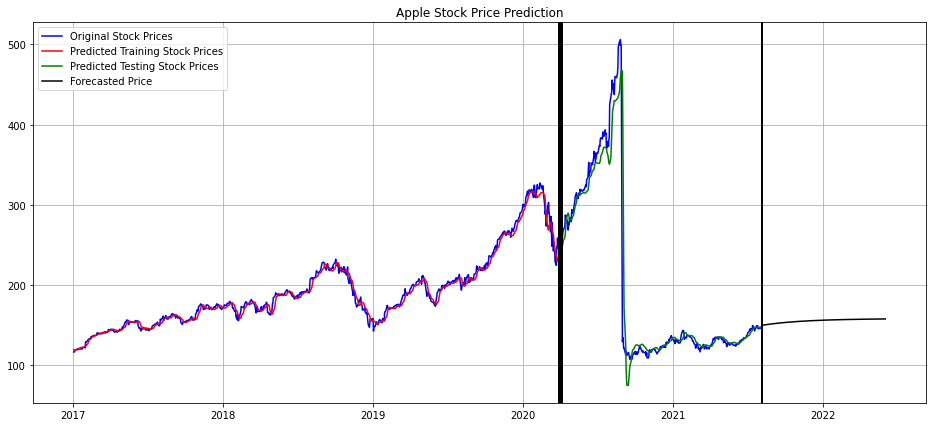

In [159]:
plt.figure(figsize = (16,7))
plt.grid(True)
plt.title('Apple Stock Price Prediction')
plt.plot(ddf.index,ddf['price'],label = "Original Stock Prices",c = 'blue')
plt.plot(ddf[:train_predict.shape[0]].index,ddf['Predicted Price'][:train_predict.shape[0]],label = "Predicted Training Stock Prices",c = 'red')
plt.plot(ddf.index[train_predict.shape[0]:],ddf['Predicted Price'][train_predict.shape[0]:],label = "Predicted Testing Stock Prices", c = 'green')

plt.plot(dffor.index,dffor['Forecast Price'], label = 'Forecasted Price',c = 'black')

plt.axvline(ddf.index[train_predict.shape[0]], color='black',lw=5)
plt.axvline(dffor.index[0], color='black',lw=2)

plt.legend()